## Library import

In [1]:
import os
from os import listdir
from os.path import isfile, join
import numpy as np
from osgeo import gdal, gdalconst
from matplotlib import pyplot as plt
import time
import re
from datetime import datetime, timedelta
import math
import pandas as pd
from osgeo.gdalconst import *

## List of files

In [2]:
# Folder containing the tif
cover = 'Wheat'
mypath = "./data_out/test/gan_results/" + cover + "/"
tif_list = [f for f in listdir(mypath) if (isfile(join(mypath, f))) and (f.endswith(".tif"))]

## Create lists from the imageCollection

In [4]:
%%time
input_dates = []
input_data = []
data_tuples = []
for f in tif_list:
    # File handlers
    img_f = join(mypath, f)
    file_handler = gdal.Open(img_f, gdalconst.GA_ReadOnly)
    if not file_handler:
        print("Error reading data from",img_f)
    else:                      
        data = file_handler.GetRasterBand(1).ReadAsArray().flatten()
        data = data[data != 255].astype(np.ubyte)
        m = (data.mean()/250)-0.08
        input_data.append(m)
        # Datetime
        date_str = re.search('\d{4}-\d{2}-\d{2}', f).group(0)
        datetime_object = datetime.strptime(date_str, '%Y-%m-%d')
        input_dates.append(datetime_object)
        t = (datetime_object, m)
        data_tuples.append(t)
       
data_tuples = sorted(data_tuples, key=lambda x: x[0])

Wall time: 229 ms


In [5]:
gan_df = pd.DataFrame(data_tuples, columns=['date','NDVI_gan'])
gan_df = gan_df.set_index('date')
gan_df

,NDVI_gan
date,
2015-11-20,0.149500
2015-11-25,0.132466
2015-11-30,0.138057
2015-12-05,0.154807
2015-12-10,0.171250
...,...
2019-12-09,0.120636
2019-12-14,0.129034
2019-12-19,0.149693


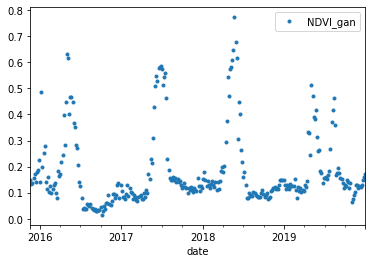

In [6]:
%matplotlib inline
plot = gan_df.plot(marker='.', linestyle='None')
fig = plot.get_figure()
ax = fig.gca()
#fig.savefig("./fig_out/"+cover+"TS.pdf", bbox_inches='tight')